# Salary Prediction using Linear Regression

### 1. Data Exploration

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error , r2_score

import warnings
warnings.filterwarnings('ignore')  # to avoud warnings


##### - Load and analyze the dataset.

In [36]:
data = pd.read_csv("Datasets/Salary_dataset.csv")
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [39]:
df = pd.DataFrame(data)   #convert into dataframe 

##### - Remove irrelevant columns 

In [40]:
df = df.drop("Unnamed: 0", axis=1)

In [41]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [6]:
df.shape

(30, 2)

##### - Handle missing values.

YearsExperience    0
Salary             0
dtype: int64

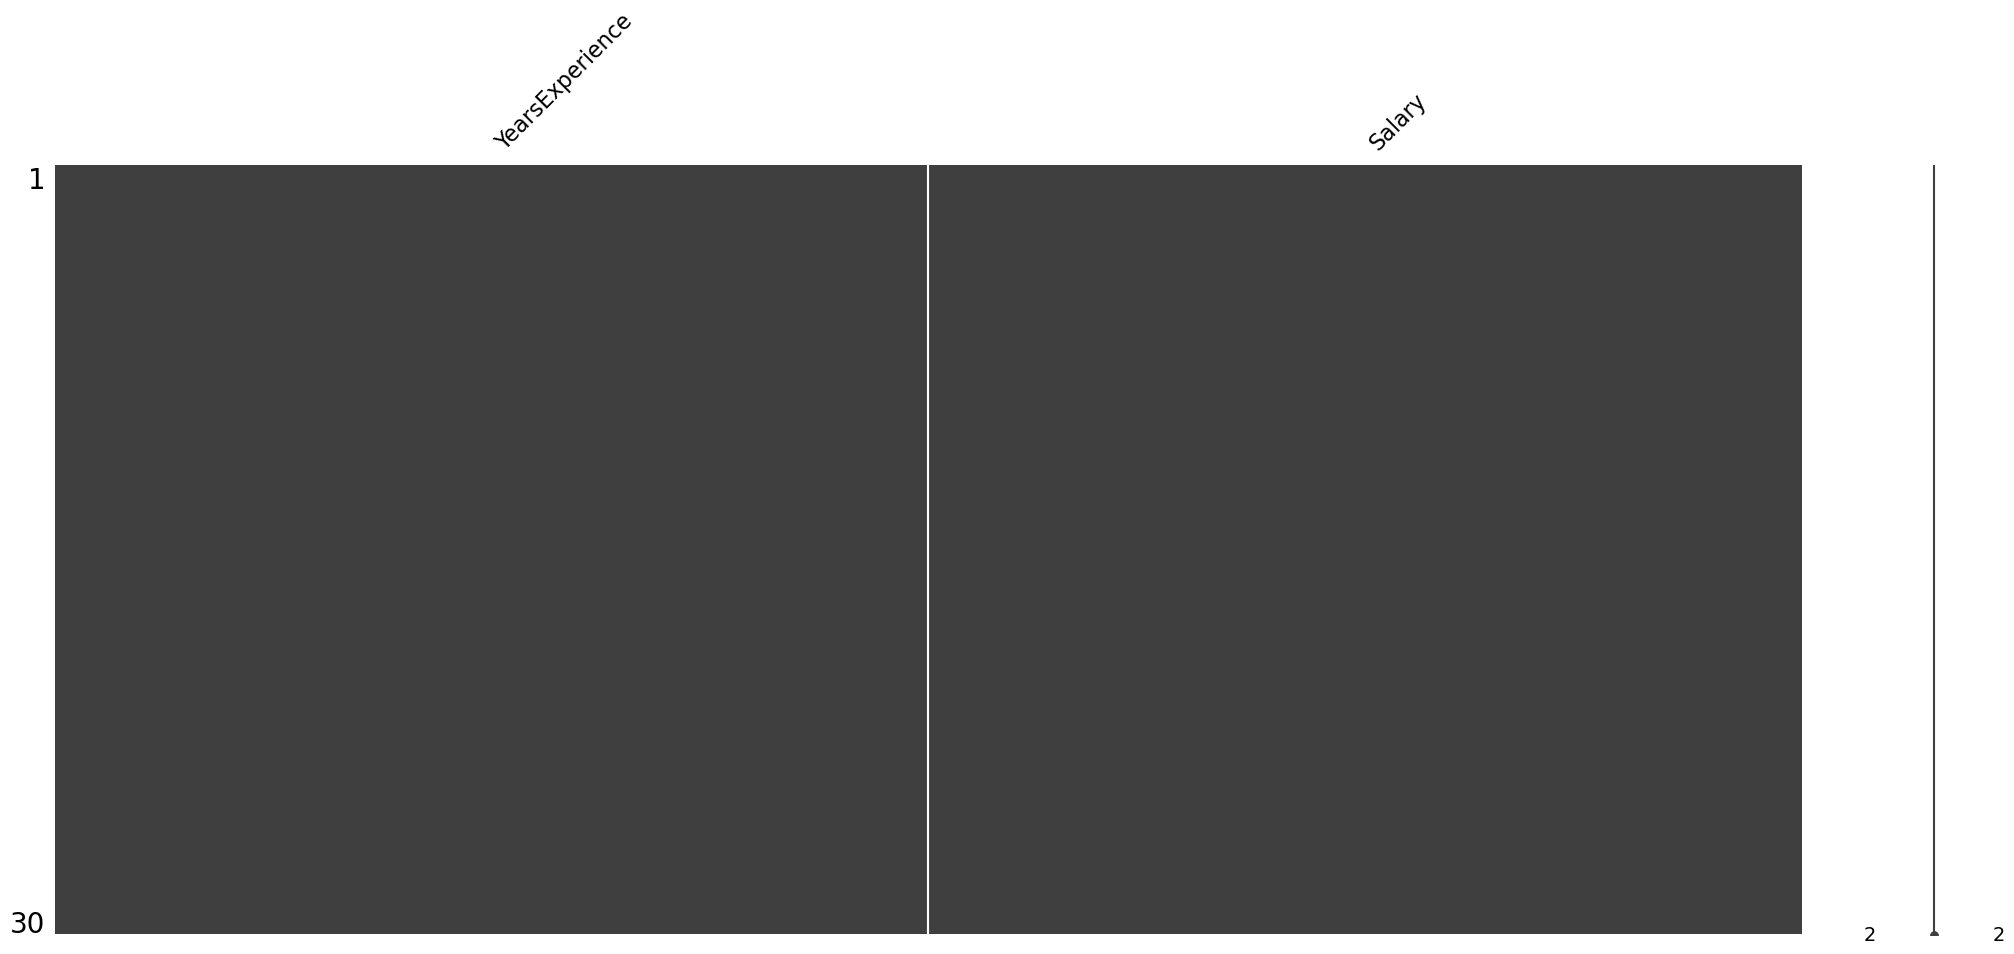

In [42]:
# missinggno is used to visualized missing values
import missingno as msno 

msno.matrix(df)

df.isnull().sum()

**NB: No missing values detected**

##### - Explore statistical summary.

In [43]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


### 2. Data Visualization

##### Create visualizations (scatter plots, histograms) for Salary and features.

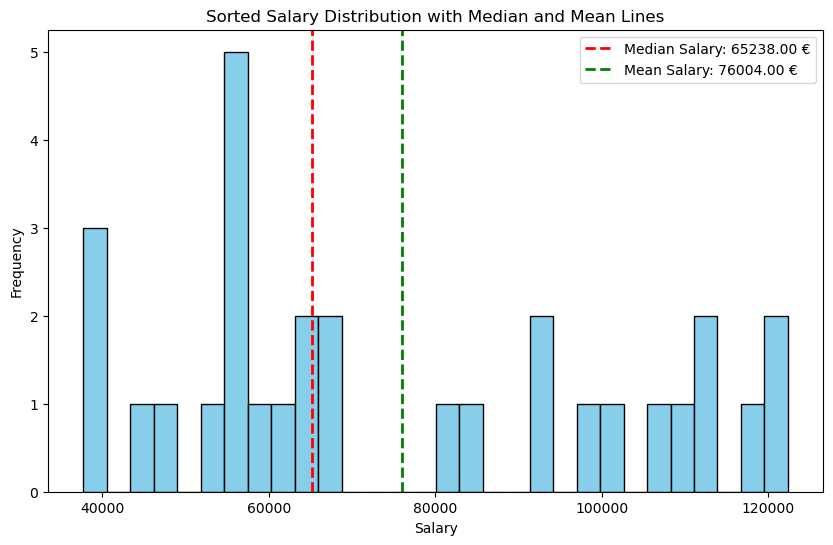

In [46]:
df_sorted = df.sort_values(by='Salary')

plt.figure(figsize=(10, 6))
plt.hist(df_sorted['Salary'], bins=30, color='skyblue', edgecolor='black')

median_salary = df_sorted['Salary'].median()
plt.axvline(median_salary, color='red', linestyle='dashed', linewidth=2, label=f'Median Salary: {median_salary:.2f} €')

mean_salary = df_sorted['Salary'].mean()
plt.axvline(mean_salary, color='green', linestyle='dashed', linewidth=2, label=f'Mean Salary: {mean_salary:.2f} €')

plt.title('Sorted Salary Distribution with Median and Mean Lines')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.legend()

# plot
plt.show()


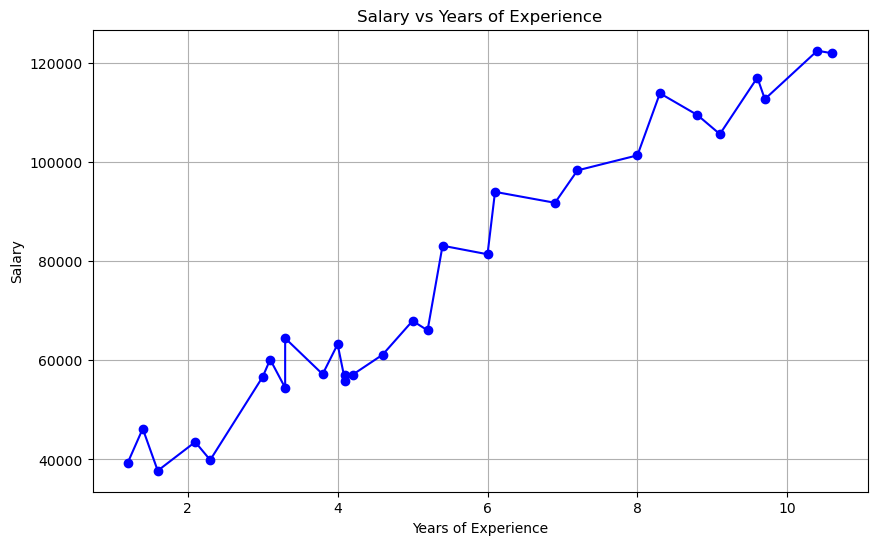

In [11]:
df[['YearsExperience', 'Salary']].sort_values(by="YearsExperience", inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['YearsExperience'], df['Salary'], marker='o', linestyle='-', color='b')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


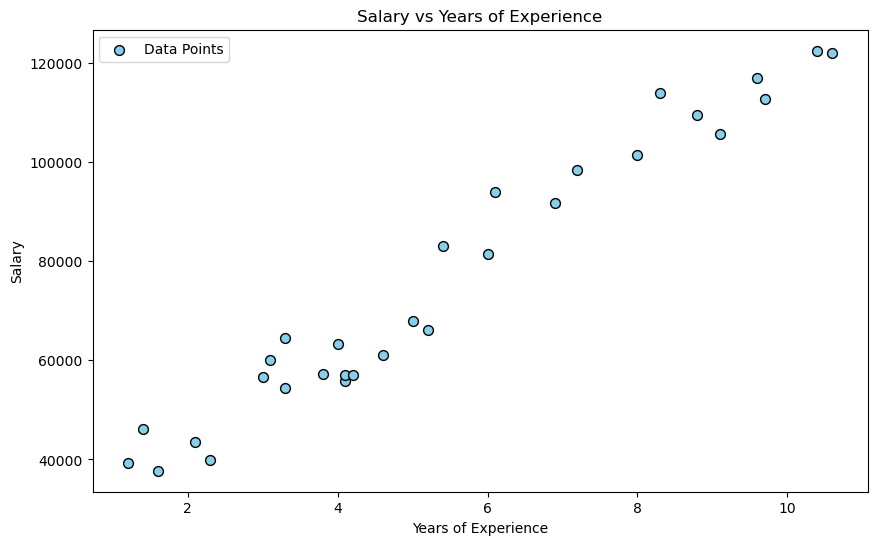

In [45]:
df_sorted = df.sort_values(by=['YearsExperience', 'Salary'])

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_sorted['YearsExperience'], df_sorted['Salary'], color='skyblue', edgecolor='black', s=50, label='Data Points') 

ax.set_title('Salary vs Years of Experience')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')

# Show legend
ax.legend()

# Display the plot
plt.show()


##### - Visualize the correlation matrix.

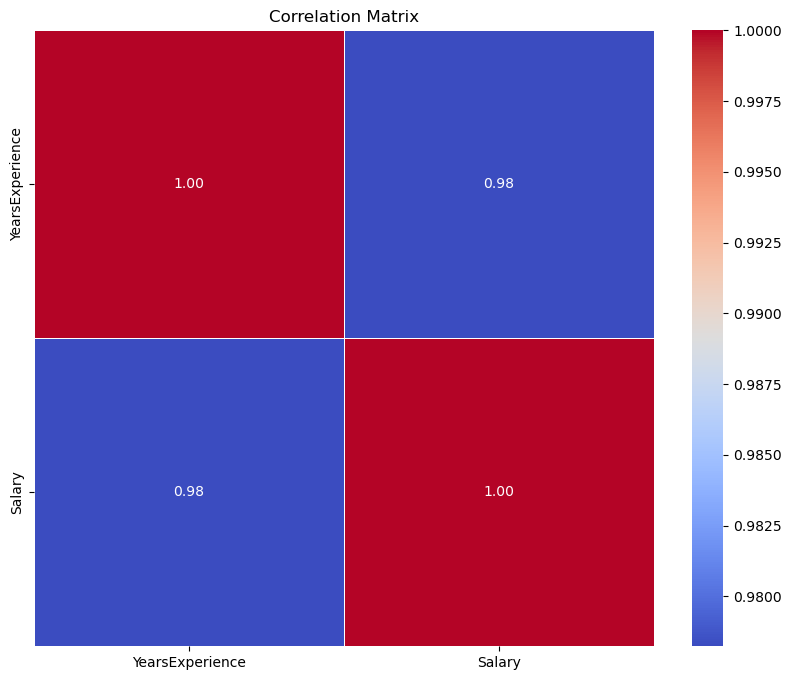

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix')

# Show the plot
plt.show()


**PS : These graphs consistently affirm a positive correlation between salary and years of experience**

### 3- Linear Regression Model

##### - Split data into training and testing sets.

In [15]:
y = df["Salary"]
X = df.drop(["Salary"] , axis=1)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train.shape , X_test.shape

((20, 1), (10, 1))

##### -  Implement simple linear regression.

In [19]:
from sklearn import linear_model

In [48]:
from sklearn import linear_model

#Create a Linear model 
reg = linear_model.LinearRegression()

#Train the model 
reg.fit(X_train , y_train)

LinearRegression()

##### - Predict the model on the test set


In [21]:
y_pred = reg.predict(X_test)

# Print the predictions
print('Predicted salaries:')
for predicted_salary in y_pred:
    print( f'{predicted_salary:.2f} €')

Predicted salaries:
115815.31 €
71512.93 €
102618.85 €
75283.34 €
55488.66 €
60201.68 €
122413.53 €
107331.87 €
63029.49 €
35693.98 €


In [22]:
# List of years of experience
experience_list = [3, 5, 8, 12]

# Predict for each years of experience
for years in experience_list:
    experience_df = pd.DataFrame({'YearsExperience': [years]})
    predicted_salary = reg.predict(experience_df)
    print(f'- Predicted salary for {years} years of experience: {predicted_salary[0]:.2f} €')

- Predicted salary for 3 years of experience: 52660.85 €
- Predicted salary for 5 years of experience: 71512.93 €
- Predicted salary for 8 years of experience: 99791.04 €
- Predicted salary for 12 years of experience: 137495.20 €


##### - Evaluate model performance (MSE, R-squared).

In [61]:
# The coefficients
print("- Coefficients:", reg.coef_)
# MAE
print("- MAE: %.2f" % mean_absolute_error(y_test, y_pred))
# The coefficient of determination R_square
print("- Coefficient of determination R_square : %.2f" % (r2_score(y_test, y_pred)*100),"%")

- Coefficients: [9426.03876907]
- MAE: 4956.52
- Coefficient of determination R_square : 95.53 %


In [59]:
# The Intercepts
print("- Intercepts: %.2f" % reg.intercept_)

- Intercepts: 24382.73


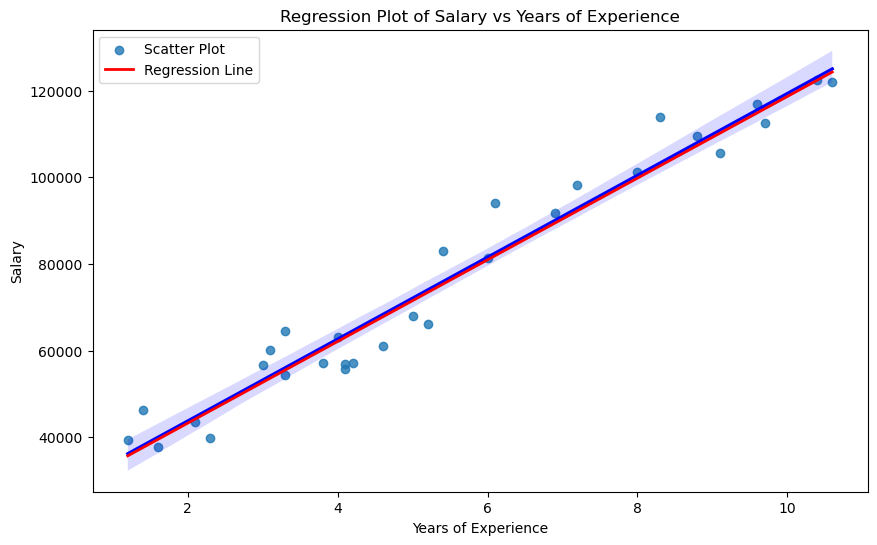

In [94]:
df_sorted = df.sort_values(by=['YearsExperience', 'Salary'])

plt.figure(figsize=(10, 6))
sns.regplot(x='YearsExperience', y='Salary', data=df_sorted, line_kws={'color': 'blue'} , label='Scatter Plot') # linear Regression 

plt.plot(df_sorted['YearsExperience'], reg.predict(df_sorted[['YearsExperience']]), color='red' ,linewidth=2 , label='Regression Line')  #Prediction 

plt.title('Regression Plot of Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

#Show legend 
plt.legend()

# Show the plot
plt.show()

# 4. Model Interpretation

##### - a. Interpret Coefficients: 
      - Explain coefficient meanings. 
      - Discuss the impact of feature changes on predicted salaries.

In [91]:
#Explain coefficient meanings.

print("coefficient: %.2f " % reg.coef_)

coefficient: 9426.04 


**Interpretation**

In the linear regression model , the relationship between the independent vairables  $$ x_i $$  ( features ) and the dependent variable $$ y_i $$ ( target ) 
is represented by the equation :  $$ y  = b_0 + b_1.x_1+...+b_n.x_n $$

In the salary-hours context, where salary is the target variable and years of experience is the feature, the relationship is expressed as:

$$ y = b_0 + \text{Coef} \cdot x_i $$ 

Here, **y** is the salary, **x_i** is the years of experience, **Coef** is the coefficient associated with years of experience, and **b_0**) is the intercept (salary when years of experience is zero).

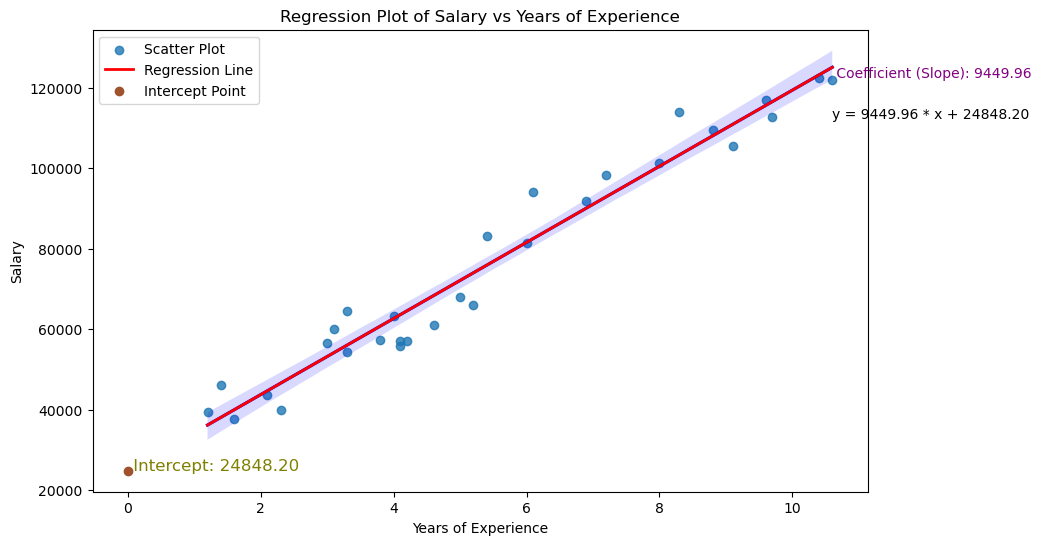

In [123]:
plt.figure(figsize=(10, 6))
sns.regplot(x='YearsExperience', y='Salary', data=df_sorted, line_kws={'color': 'blue'}, label='Scatter Plot')

plt.plot(df_sorted['YearsExperience'], reg.predict(df_sorted[['YearsExperience']]), color='red', linewidth=2, label='Regression Line')

intercept_point = reg.intercept_
plt.scatter([0], [intercept_point], color='sienna', marker='o', label='Intercept Point')
plt.text(0, intercept_point, f' Intercept: {intercept_point:.2f}', fontsize=12, ha='left', color='olive')

slope_coef = reg.coef_[0]
plt.text(df_sorted['YearsExperience'].max(), df_sorted['Salary'].max(), f' Coefficient (Slope): {slope_coef:.2f}', fontsize=10, ha='left', color='purple')

equation_text = f'y = {slope_coef:.2f} * x + {intercept_point:.2f}'
plt.text(df_sorted['YearsExperience'].max(), df_sorted['Salary'].max() - 10000, equation_text, fontsize=10, ha='left')

plt.title('Regression Plot of Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.legend()
plt.show()


**- Discuss the impact of feature changes on predicted salaries.**

There is a positive association between salary and years of experience, indicating that as years of experience increase, so does the corresponding salary.